In [6]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import random

In [4]:
X,y=make_blobs(centers=4,random_state=42)

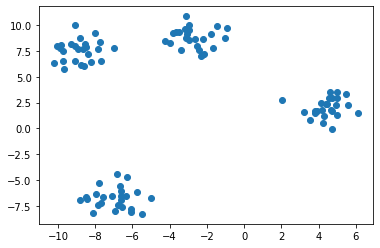

In [5]:
plt.scatter(X[:,0],X[:,1])

In [40]:
class Cluster:
    
    def __init__(self,center,name):
        self.name=name
        self.center =center
        self.points=[]
        
    def distance(self,point):
        return np.sqrt(np.sum((self.center-point)**2))
    
    def relocate(self):
        self.center=np.mean(self.points,axis=0)
        self.points.clear()
        
class coustom:
    
    def __init__(self,maxiter=10,n_clusters=3):
        self.maxiter=maxiter
        self.n_clusters=n_clusters
        
    def fit(self,X):
        clusters=[]
        
        for i in range(self.n_clusters):
            cluster=Cluster(center=random.choice(X),name=i)
            clusters.append(cluster)
        errors=[]
        
        for it in range(self.maxiter):
            
            labels=[]
            
            for point in X:
                
                distances=[]
                
                for cluster in clusters:
                    distance=cluster.distance(point)
                    distances.append((distance,cluster.name))
                
                distance,cluster_name=sorted(distances)[0]
                
                labels.append(cluster_name)
                
                cluster=clusters[cluster_name]
                cluster.points.append(point)
                
            err=self.error(X,clusters,labels)
            errors.append(err)
            
            for cluster in clusters:
                cluster.relocate()
                
                
            self.labels=labels
            self.center=[cluster.center for cluster in clusters]
            
        return errors
    
    
    def error(self,X,clusters,labels):
        err=0
        for point,label in zip(X,labels):
            cluster=clusters[label]
            err+=cluster.distance(point)
        return err/len(X)

In [41]:
a=coustom()

In [42]:
err=a.fit(X)

In [43]:
#a.labels

In [44]:
a.center

[array([-5.77644235,  8.14575097]),
 array([4.44441765, 2.02122148]),
 array([-6.9749469 , -6.76471966])]

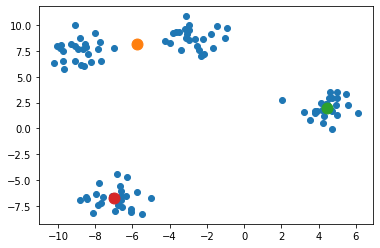

In [45]:
plt.scatter(X[:,0],X[:,1])
for center in a.center:
    plt.scatter(center[0],center[1],s=120)

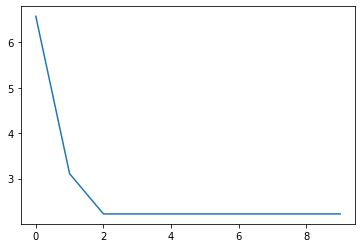

In [46]:
plt.plot(err)